In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.utils as torch_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Below is some data I collected from houses in Elmhurst, Illinois.

In [3]:
training_data_raw = {
    'price': [330000.0, 347000.0, 1249900.0, 339900.0, 750000.0, 379000.0,409900.0],
    'sqrfoot': [1125.0, 802.0, 3734.0, 1300.0, 4200.0, 1100.0, 1767.0],
    'miles_to_school': [3.0, 1.6, 2.2, 2.6, 0.6, 5.0, 2.1],
    'yearbuilt': [1954.0, 1925.0, 2006.0, 1950.0, 1930.0, 1960.0, 1950.0]
}

training_df = pd.DataFrame(data=training_data_raw)
X = torch.tensor(training_df[['sqrfoot', 'miles_to_school', 'yearbuilt']].values, dtype=torch.float32)
Y = torch.tensor(training_df[['price']].values, dtype=torch.float32)
Y.transpose

print(f"X: {X}")
print(f"\nY: {Y}")

X: tensor([[1.1250e+03, 3.0000e+00, 1.9540e+03],
        [8.0200e+02, 1.6000e+00, 1.9250e+03],
        [3.7340e+03, 2.2000e+00, 2.0060e+03],
        [1.3000e+03, 2.6000e+00, 1.9500e+03],
        [4.2000e+03, 6.0000e-01, 1.9300e+03],
        [1.1000e+03, 5.0000e+00, 1.9600e+03],
        [1.7670e+03, 2.1000e+00, 1.9500e+03]])

Y: tensor([[ 330000.],
        [ 347000.],
        [1249900.],
        [ 339900.],
        [ 750000.],
        [ 379000.],
        [ 409900.]])


Creating the model.

In [7]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.input = nn.Linear(3,3)
        self.output=nn.Linear(3,1)

    def forward(self, x):
        x = torch.relu(self.input(x))
        return self.output(x)
    
model = LinearModel()

In [20]:
loss_function = nn.MSELoss()

learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=.09)

Below is the training loop:

In [37]:
loss_array = []

num_epochs = 20000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = model(X)

    loss = loss_function(predictions, Y)
    loss_array.append((loss.item()))

    loss.backward()

    torch_utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")

print(f"initial: {loss_array[0]}")
print(f"new: {loss_array[-1]}")

Epoch: 50, Loss: 27638562816.0000
Epoch: 100, Loss: 27638415360.0000
Epoch: 150, Loss: 27638278144.0000
Epoch: 200, Loss: 27638126592.0000
Epoch: 250, Loss: 27637989376.0000
Epoch: 300, Loss: 27637841920.0000
Epoch: 350, Loss: 27637714944.0000
Epoch: 400, Loss: 27637567488.0000
Epoch: 450, Loss: 27637428224.0000
Epoch: 500, Loss: 27637280768.0000
Epoch: 550, Loss: 27637139456.0000
Epoch: 600, Loss: 27637006336.0000
Epoch: 650, Loss: 27636856832.0000
Epoch: 700, Loss: 27636723712.0000
Epoch: 750, Loss: 27636576256.0000
Epoch: 800, Loss: 27636436992.0000
Epoch: 850, Loss: 27636291584.0000
Epoch: 900, Loss: 27636156416.0000
Epoch: 950, Loss: 27636011008.0000
Epoch: 1000, Loss: 27635869696.0000
Epoch: 1050, Loss: 27635726336.0000
Epoch: 1100, Loss: 27635593216.0000
Epoch: 1150, Loss: 27635433472.0000
Epoch: 1200, Loss: 27635298304.0000
Epoch: 1250, Loss: 27635159040.0000
Epoch: 1300, Loss: 27635019776.0000
Epoch: 1350, Loss: 27634882560.0000
Epoch: 1400, Loss: 27634728960.0000
Epoch: 1450,

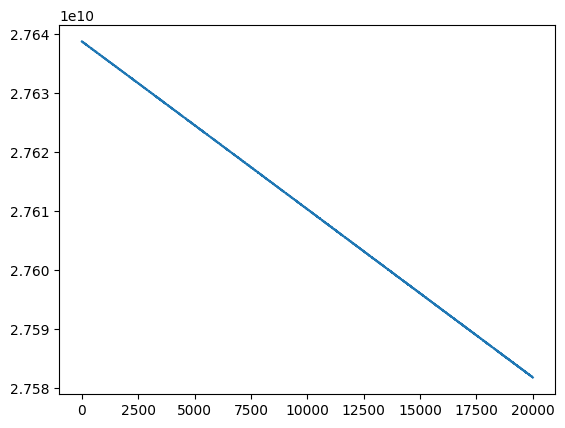

In [38]:
epochs_array = []
for i in range(num_epochs):
    epochs_array.append(i)
plt.plot(epochs_array, loss_array)
plt.show()

In [39]:
input = torch.tensor([[1567, 2.9, 1962]], dtype=torch.float32)
print(f"input tensor: {input}")

output = model(input)
#input is a tensor of sqrtfoot, miles to school, yearbuilt
print(f"Predicted price: ${output.item():.2f}")
# answer = 490000
answer = torch.tensor([[490000]], dtype=torch.float32)
print(f"off by: ${(output.item()-answer.item()):.4f}")

input tensor: tensor([[1567.0000,    2.9000, 1962.0000]])
Predicted price: $454886.09
off by: $-35113.9062


In [40]:
answer = torch.tensor([[459900]], dtype=torch.float32)
input = torch.tensor([[1409, 1.9, 1567]])

output = model(input)
print(output.item())
print(f"off by: ${(output.item()-answer.item()):.4f}")

395809.09375
off by: $-64090.9062
